<h1><center>TITANIC</center></h1>
<h3><center>Data Analysis</center></h3>

The data was provided by Udacity as part of the Data Analysis Nanodegree. This data contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. Extra detail on the data can be found on Kaggles website on the following [Link](https://www.kaggle.com/c/titanic/data).

### Questions

This Data Analysis will explore the hypothesis that woman and upper class passengers are the majority of survivors.

1. Are woman a majority of survivors?
2. Does having an upper class ticket means surviving the titanic?


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
#Add the data csv file to original var
original = pd.read_csv('titanic_data.csv')
#Use df as variable for data so original is available for backups
df = original

In [34]:
#look at the first 3 rows of the data
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [35]:
#look at the first 3 rows of the data
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Both Age and Cabin show NaN's, that will be investigated later.

Columns with Passenger ID, Name, Ticket, will be excluded due to being unique to each passenger and not indicating a relation to the questions being investigated.

In [36]:
#exclude Passenger ID, Name and Ticket
df = df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
#check how it is now
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [37]:
print('We are left with',df.shape[0],'lines and',df.shape[1],'columns')

We are left with 891 lines and 9 columns


The columns contain the following description:
     
     - Survived : 1 = Yes, 0 = No
     - Pclass 1 : Upper, 2 = Middle, 3 = Lower
     - Sex
     - Age
     - SibSp : Number of Siblings/Spouses Aboard
     - Parch : Number of Parents/Children Aboard
     - Fare : Passenger Fare
     - Cabin
     - Embarked : Port of Embarkation
         C = Cherbourg
         Q = Queenstown
         S = Southampton

In [38]:
#check what kind of data
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [39]:
#to better look at the data, change letter for cities emberked
df['Embarked'] = df['Embarked'].replace(['S','Q','C'],['Southampton','Queenstown','Cherbourg'])

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,Southampton
1,1,1,female,38.0,1,0,71.2833,C85,Cherbourg
2,1,3,female,26.0,0,0,7.9250,NaN,Southampton
3,1,1,female,35.0,1,0,53.1000,C123,Southampton
4,0,3,male,35.0,0,0,8.0500,NaN,Southampton


Dealing with NaN's

In [41]:
#looking at the entire data set numbers
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
#checking how many nulls.
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Due to data sample being large, and age being expected to be a large influence on the survival rate and questions investigated, it was prefered to exclude NaN's from Age, which would still remain with a sample size of 714.

Embarked NaN's are also excluded.

Cabin seems to be the biggest concern, over 70% is NaN's. Thus, the Cabin column is excluded. However, if more information on cabin was available, their locations and emergency exits, it could be a good source of information.

In [43]:
#excluding Cabin
df = df.drop(['Cabin'], axis=1)

In [44]:
#excluding rows with NaN's
df = df.dropna()

In [45]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,Southampton
1,1,1,female,38.0,1,0,71.2833,Cherbourg
2,1,3,female,26.0,0,0,7.9250,Southampton
3,1,1,female,35.0,1,0,53.1000,Southampton
4,0,3,male,35.0,0,0,8.0500,Southampton


We can now start looking at the data from a graphical point of view in order to look for patterns

The boat had 453 males and 259 females distributed the following way by age:
It is imaginable that males will be the majority of survival, since they are the majority on board




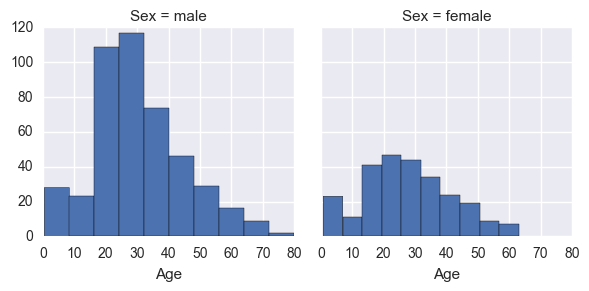

In [46]:
#create a variable for percenta number, and total of surviving females
df_female_per = around(df[df.Sex=='female'].Survived.value_counts(normalize=True).sort_index(),2)
df_female_num = df[df.Sex=='female'].Survived.value_counts().sort_index()
df_female_sum = df[df.Sex=='female'].Survived.value_counts().sort_index().sum()

#create a variable for percent, number, and total of surviving males
df_male_per = around(df[df.Sex=='male'].Survived.value_counts(normalize=True).sort_index(),2)
df_male_num = df[df.Sex=='male'].Survived.value_counts().sort_index()
df_male_sum = df[df.Sex=='male'].Survived.value_counts().sort_index().sum()

g = sns.FacetGrid(df, col="Sex")
g.map(plt.hist, "Age");
print('The boat had', df_male_num.sum(),'males and', df_female_num.sum(),'females distributed the following way by age:')
print('It is imaginable that males will be the majority of survival, since they are the majority on board')
print("\n")

We can also see that both male and female are positively skewed and that the AGE range between 20 and 40 contains the higher number of individuals

In [47]:
print("In summary we can see that females have a", (df_female_per[1]*100),'%', "survival rate, with", (df_female_num[1]), "surviving from a total of",(df_female_sum),".")
print("When comparing to man, the female numbers seem even more surprising. Man have a survival rate of", (df_male_per[1]*100),'%', "with", (df_male_num[1]),"surviving from a total of ",(df_male_sum),".")

In summary we can see that females have a 75.0 % survival rate, with 195 surviving from a total of 259 .
When comparing to man, the female numbers seem even more surprising. Man have a survival rate of 21.0 % with 93 surviving from a total of  453 .


The plots below show how significant the diference is between male and female:

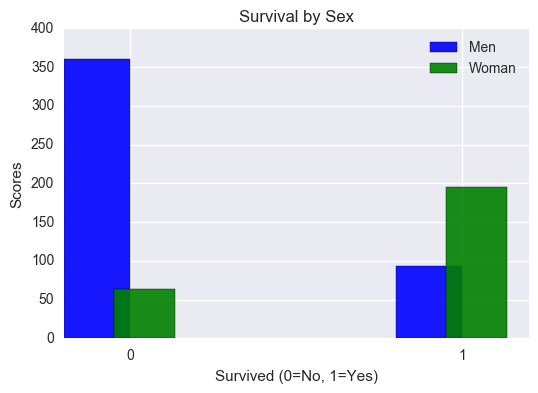

In [48]:
#have a graph that shows the difference between male and fimale
fig, ax = plt.subplots() #two graphs combined
n_groups = 2 
bar_width = 0.40
index = np.arange(n_groups)
opacity = 0.9
error_config = {'ecolor': '0.3'}

#graph for the male variable
rects1 = plt.bar(index, df_male_num, 0.2,
                 alpha=opacity,
                 color='b',
                 label='Men')

#graph for the female variable
rects2 = plt.bar(index + 0.15, df_female_num, 0.185,
                 alpha=opacity,
                 color='g',
                 label='Woman')

plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Scores')
plt.title('Survival by Sex')
plt.xticks(index + bar_width/2, ('0', '1'))

plt.legend()

plt.show()


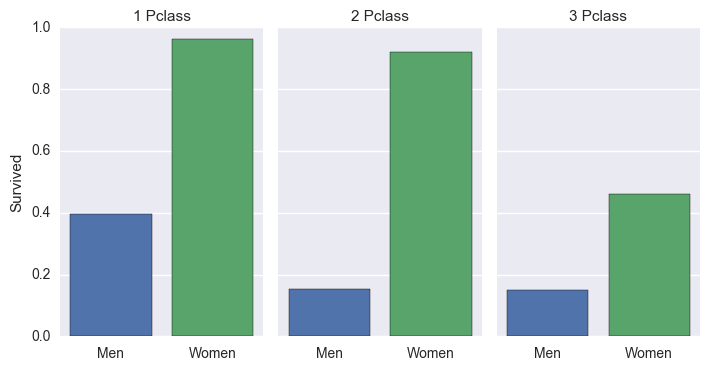

In [49]:
#graph that checks if class makes a difference in sex survival rate
g = sns.factorplot(x="Sex", y="Survived", col="Pclass",
                   data=df, saturation=0.9,
                   kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survived")
  .set_xticklabels(["Men", "Women"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))    

The graph below shows that the embarking city has the same relation: most females surviving




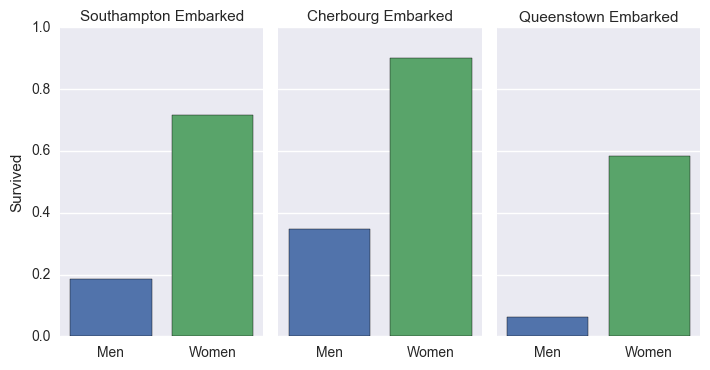

In [50]:
#check if different embarking cities make a difference
g = sns.factorplot(x="Sex", y="Survived", col="Embarked",
                   data=df, saturation=0.9,
                   kind="bar", ci=None, aspect=.6)
(g.set_axis_labels("", "Survived")
  .set_xticklabels(["Men", "Women"])
  .set_titles("{col_name} {col_var}")
  .set(ylim=(0, 1))
  .despine(left=True))   
print('The graph below shows that the embarking city has the same relation: most females surviving')
print("\n")

### Question 1

The series graphs above shows that despite man being the majority on the boat, woman survival rate is higher on all classes and has no distinction among where those people boarded the boat.

Based on the different shown graphs above, it could be interpreted that being a woman on the titanic gives you a 75% chance of survival, no mather which class you are on the boat or which city you embarked.

________________________


### The same process from question 1 can be taken to analyse question 2

In [51]:
df_pclass1_per = round(df[df.Pclass==1].Survived.value_counts(normalize=True).sort_index(),2)
df_pclass1_num = df[df.Pclass==1].Survived.value_counts().sort_index()
df_pclass1_sum = df[df.Pclass==1].Survived.value_counts().sort_index().sum()

df_pclass2_per = round(df[df.Pclass==2].Survived.value_counts(normalize=True).sort_index(),2)
df_pclass2_num = df[df.Pclass==2].Survived.value_counts().sort_index()
df_pclass2_sum = df[df.Pclass==2].Survived.value_counts().sort_index().sum()

df_pclass3_per = round(df[df.Pclass==3].Survived.value_counts(normalize=True).sort_index(),2)
df_pclass3_num = df[df.Pclass==3].Survived.value_counts().sort_index()
df_pclass3_sum = df[df.Pclass==3].Survived.value_counts().sort_index().sum()

We can see that the number of passengers on the Lower class is equal to the sum of both middle and upper class




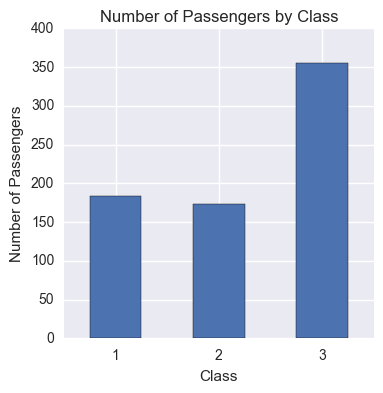

In [52]:
#graph that shows all classes and its total passengers
df_class = df['Pclass'].value_counts().sort_index()
df_class.plot(kind='bar', figsize=(4,4), rot=0, grid=True)

plt.title('Number of Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Number of Passengers')

print('We can see that the number of passengers on the Lower class is equal to the sum of both middle and upper class')
print("\n")

The graphs below shows Age distribution by class
We can see that Lower class, which is the majority of individuals on board, is mainly on the 20 to 40 age range




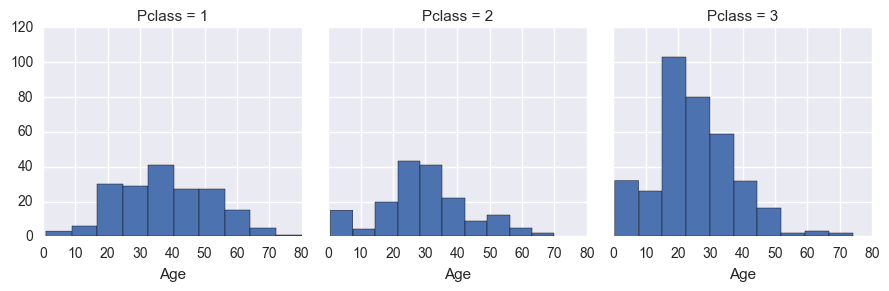

In [53]:
g_class_age = sns.FacetGrid(df, col="Pclass")
g_class_age.map(plt.hist, "Age");
print('The graphs below shows Age distribution by class')
print('We can see that Lower class, which is the majority of individuals on board, is mainly on the 20 to 40 age range')
print("\n")

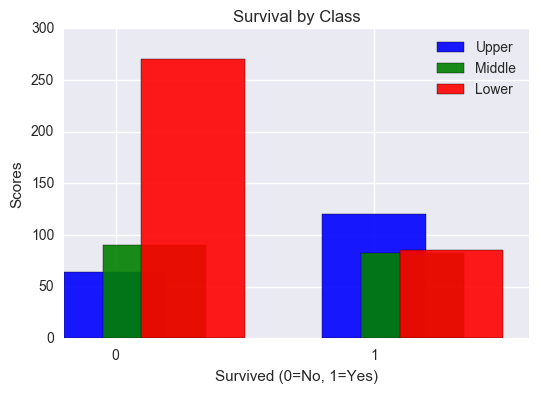

In [54]:
n_groups = 2

fig, ax = plt.subplots()

index = np.arange(n_groups)

bar_width = 0.4

opacity = 0.9
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, df_pclass1_num, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Upper'
                 )

rects2 = plt.bar(index + 0.15, df_pclass2_num, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Middle'
                 )

rects3 = plt.bar(index + 0.30, df_pclass3_num, bar_width,
                 alpha=opacity,
                 color='r',
                 label='Lower'
                 )

plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Scores')
plt.title('Survival by Class')
plt.xticks(index + bar_width/2, ('0', '1'))
plt.legend()

plt.show()

In [55]:
print("In summary we can see that the boat had", (df_class.sum()), "passengers, divided into 3 classes:")
print("Upper Class, with 184 passengers, middle class with 173 passengers and lower class with 355 passengers")

print("When comparing to each other, the lower class number is the biggest surprise. Lower class have a survival rate of", (df_pclass3_per[1]*100),'%', "with", (df_pclass3_num[1]),"surviving from a total of ",(df_pclass3_sum),".")
print("On the other end, upper class have a survival rate of", (df_pclass1_per[1]*100),'%', "with", (df_pclass1_num[1]),"surviving from a total of ",(df_pclass1_sum),".")
print("Lastly, middle class have a survival rate of", (df_pclass2_per[1]*100),'%', "with", (df_pclass2_num[1]),"surviving from a total of ",(df_pclass2_sum),".")

In summary we can see that the boat had 712 passengers, divided into 3 classes:
Upper Class, with 184 passengers, middle class with 173 passengers and lower class with 355 passengers
When comparing to each other, the lower class number is the biggest surprise. Lower class have a survival rate of 24.0 % with 85 surviving from a total of  355 .
On the other end, upper class have a survival rate of 65.0 % with 120 surviving from a total of  184 .
Lastly, middle class have a survival rate of 48.0 % with 83 surviving from a total of  173 .


### Question 2

The series graphs above show a similar trend from the sex comparison. The majority of passenger is composed of passengers in the lower class. However, it was the upper and middle classes that got the most survivors.

Based on the different shown graphs above, it could be interpreted that being on upper class gives a better chance of surviving, when traveling on middle class that chance diminishes to a slightly higher chance of not surviving. For the lower class, the chance of surviving is minimal.

### References:
- http://seaborn.pydata.org/index.html
- http://matplotlib.org/examples/
- https://www.kaggle.com/c/titanic/data
- http://stackoverflow.com/questions/14883339/two-bar-charts-in-matplotlib-overlapping-the-wrong-way
- http://pandas.pydata.org/
- https://docs.scipy.org